<a href="https://colab.research.google.com/github/michellechen202212/ucb/blob/module11/predictingcarprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](https://github.com/michellechen202212/ucb/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Answer:** From a data perspective, the goal is to determine the key predictors (features) that influence the target variable, which is the price of a used car. This involves analyzing the relationships between various car attributes, such as year, mileage, condition, manufacturer, model, transmission, fuel type, and other features, and the car's price. The task requires building a predictive model using supervised machine learning techniques, where the target variable is car price and the input features include both numerical and categorical variables.





### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Answer:** To understand the dataset, we begin by loading and inspecting its structure, identifying feature types, null values, and overall dimensions. Key steps include summarizing numerical and categorical features, checking for missing data, and visualizing distributions to detect outliers or anomalies. Relationships between features and the target variable (price) are explored through correlation analysis, scatter plots, and group-by operations. Data consistency is verified by checking for logical errors (e.g., negative mileage or invalid years), while outliers and imbalances in categorical data are addressed as needed. Finally, observations are documented to inform hypotheses and prepare the dataset for predictive modeling.

The following code systematically explores the dataset, identifies potential quality issues, and provides visual insights into the structure and distribution of the data. Here are the steps:

1. Data Loading and Overview
The dataset is loaded into a pandas DataFrame (vehicles_data) from a CSV file.
Basic statistics (describe()) and metadata (info()) are extracted to understand the dataset's shape, data types, and missing values.

2. Initial Exploration:
The shape (number of rows and columns) and column names are retrieved.
Missing values are identified, and data types of all columns are summarized.

3. Feature Analysis:
Numerical Features: Summary statistics (mean, median, min, max) are calculated for all numerical columns.
Categorical Features: The number of unique values (cardinality) is calculated for each categorical column.
Data Quality Checks:

4. Negative Mileage: Records with negative values in the odometer column are counted.
Future Year Records: Rows where the year column exceeds the current year are identified.

5. Outlier Detection:
The IQR (Interquartile Range) method is applied to detect potential outliers in numerical columns, and their counts are recorded.

6. Visualization:
Categorical Features: A bar chart is plotted to show the cardinality (number of unique values) for each categorical feature.
Numerical Features:
Histograms are created to visualize distributions of numerical columns.
Boxplots are plotted for each numerical column to detect and display outliers.

7. Results Compilation:
The findings (e.g., dataset shape, missing values, outliers, and quality checks) are compiled into a dictionary (results) for display, summarizing the data exploration.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

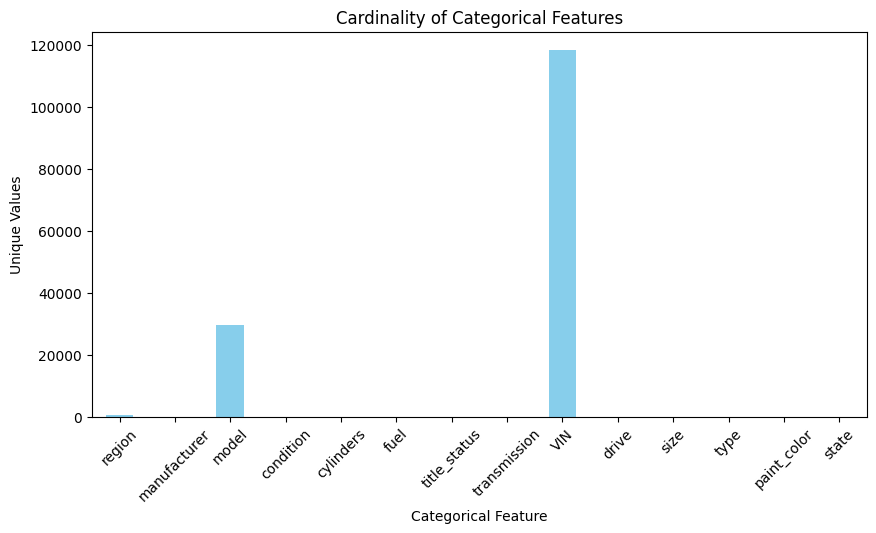

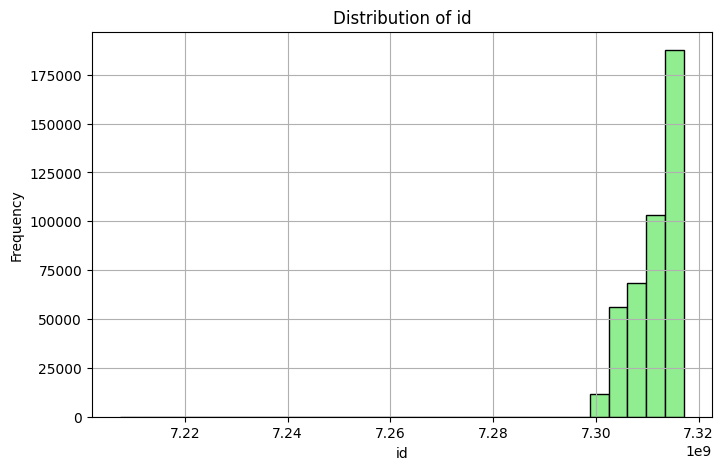

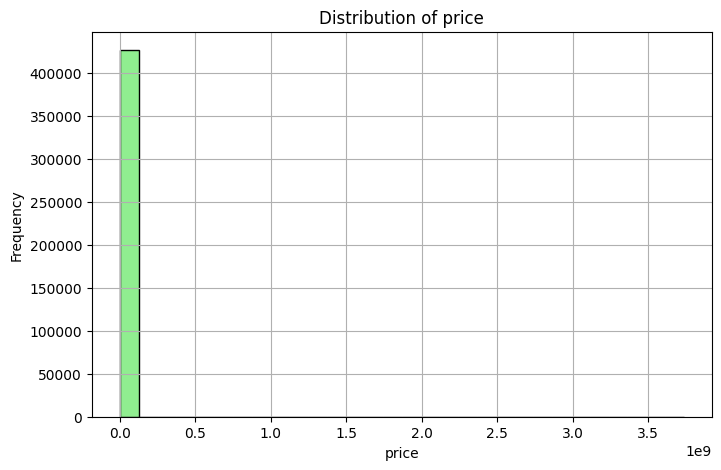

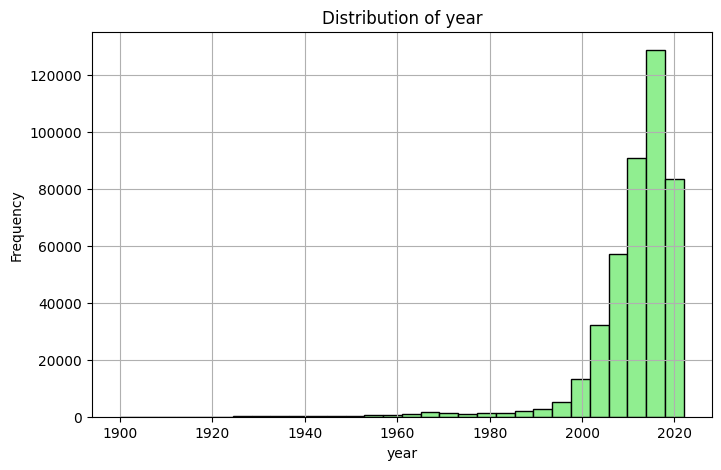

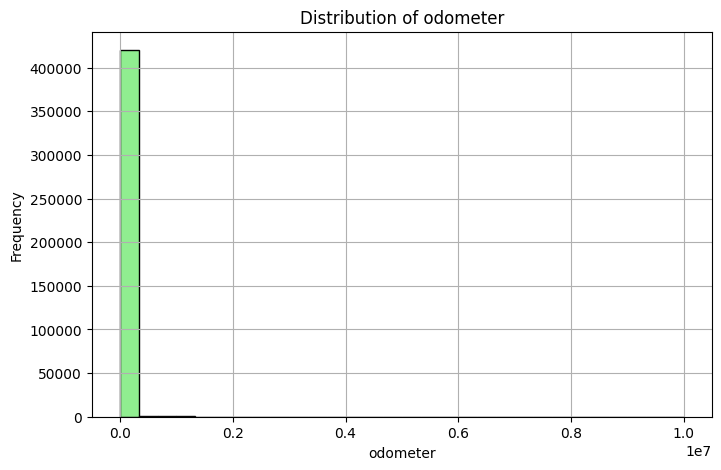

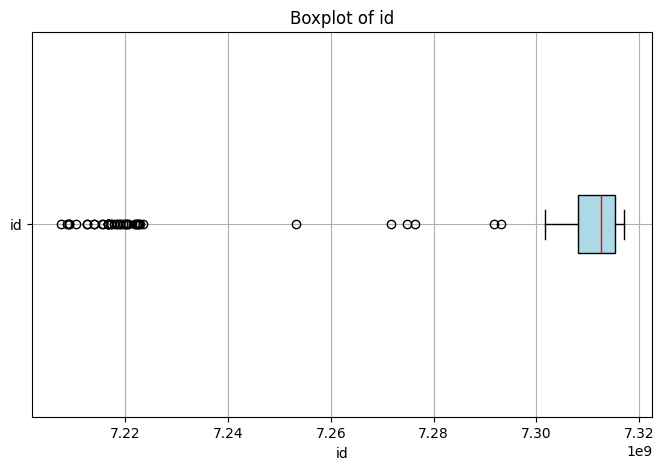

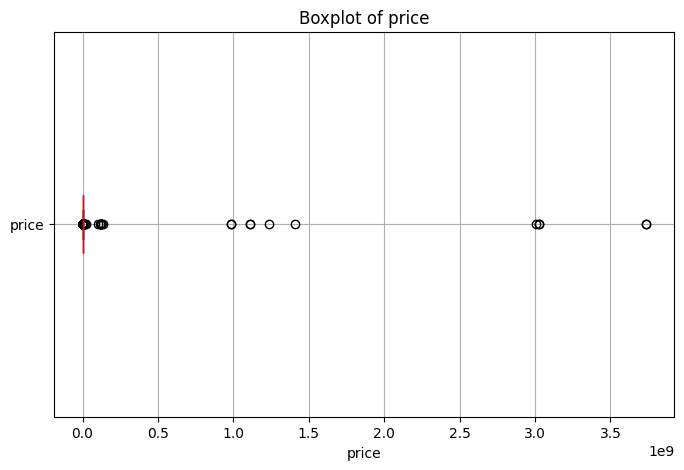

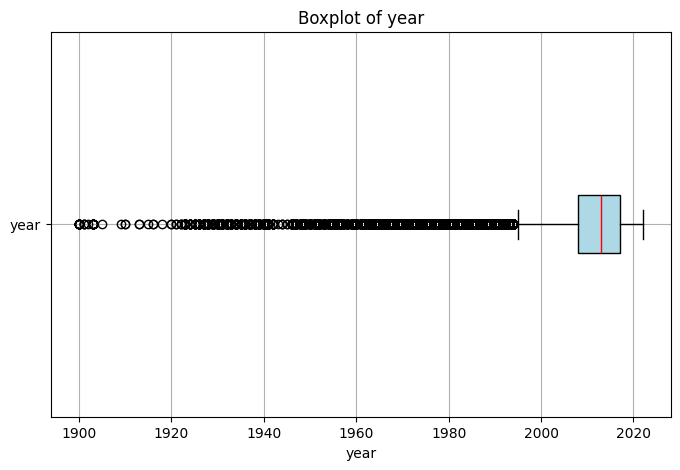

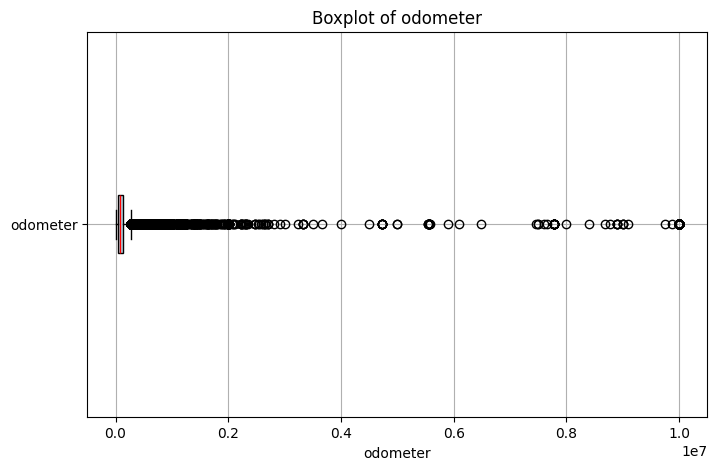

In [2]:
# Load the dataset to begin analysis
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Initial exploration: shape, data types, missing values
vehicles_data.describe(), vehicles_data.info()
shape = vehicles_data.shape
columns = vehicles_data.columns.tolist()
missing_values = vehicles_data.isnull().sum()
data_types = vehicles_data.dtypes

# Summary statistics for numerical features
numerical_features = vehicles_data.select_dtypes(include=["float64", "int64"]).columns
numerical_stats = vehicles_data[numerical_features].describe()

# Categorical features analysis
categorical_features = vehicles_data.select_dtypes(include=["object"]).columns
categorical_cardinality = vehicles_data[categorical_features].nunique()

# Negative mileage check
negative_mileage_count = vehicles_data[vehicles_data['odometer'] < 0].shape[0]

# Future years check
import datetime
current_year = datetime.datetime.now().year
future_year_records = vehicles_data[vehicles_data['year'] > current_year].shape[0]

# Outliers using IQR method
outliers = {}
for column in numerical_features:
    Q1 = vehicles_data[column].quantile(0.25)
    Q3 = vehicles_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = vehicles_data[(vehicles_data[column] < Q1 - 1.5 * IQR) |
                                     (vehicles_data[column] > Q3 + 1.5 * IQR)][column].count()

# Compile results into a dictionary for display
results = {
    "Shape": shape,
    "Columns": columns,
    "Missing Values": missing_values,
    "Data Types": data_types,
    "Numerical Stats": numerical_stats,
    "Outliers Count": outliers,
    "Categorical Cardinality": categorical_cardinality,
    "Negative Mileage Records": negative_mileage_count,
    "Future Year Records": future_year_records
}

print(results)

# Plot cardinality of categorical features
categorical_cardinality.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Cardinality of Categorical Features')
plt.xlabel('Categorical Feature')
plt.ylabel('Unique Values')
plt.xticks(rotation=45)
plt.show()

# Plot distributions of numerical features
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    vehicles_data[column].hist(bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots for numerical features to detect outliers
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    vehicles_data.boxplot(column=column, vert=False, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='black'),
                          whiskerprops=dict(color='black'), capprops=dict(color='black'),
                          medianprops=dict(color='red'))
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


**Analysis:**
Key Takeaways
Data Issues:

Missing values in key columns (condition, cylinders, size) need to be addressed.
Extreme outliers in price, year, and odometer should be investigated and potentially removed or capped.
Feature Variability:

Categorical features like model and region have high cardinality, requiring encoding strategies or aggregation.
Features like condition and fuel have low cardinality and can be easily incorporated into models.
Target Variable (price):

Highly skewed with extreme outliers, requiring scaling or transformation for analysis.
These insights set the stage for data cleaning, feature engineering, and further exploration to identify key drivers of car prices.

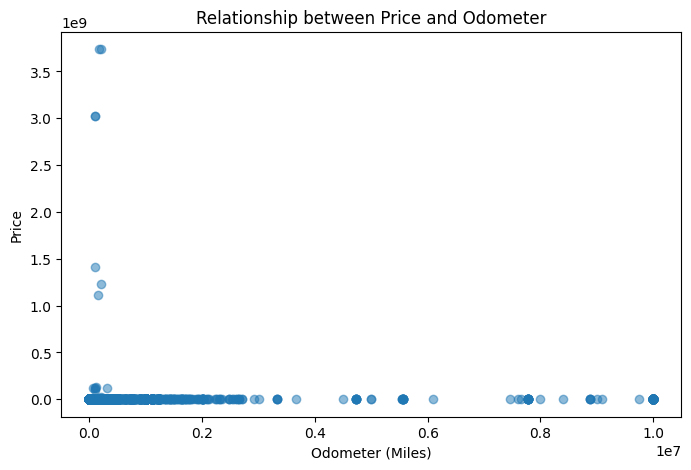

<Figure size 1000x600 with 0 Axes>

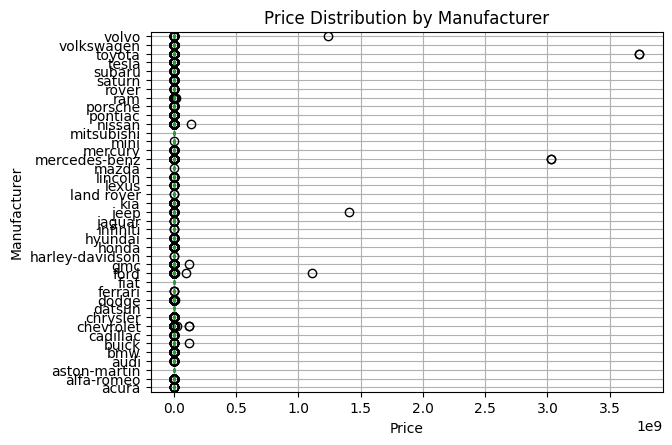

<Figure size 1000x600 with 0 Axes>

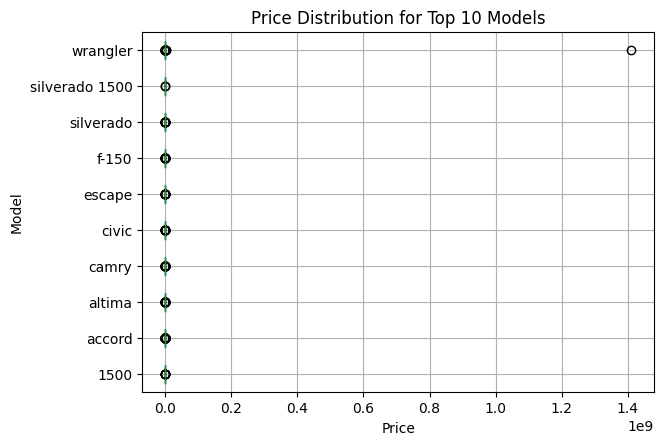

In [3]:
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Filter out rows with missing values in relevant columns
relevant_columns = ['price', 'model', 'odometer','manufacturer']
filtered_data = vehicles_data[relevant_columns].dropna()

# Price vs. Odometer
plt.figure(figsize=(8, 5))
plt.scatter(filtered_data['odometer'], filtered_data['price'], alpha=0.5)
plt.title('Relationship between Price and Odometer')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price')
plt.show()

# Price vs. Manufacturer (Boxplot)
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='price', by='manufacturer', vert=False)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.suptitle('')  # Remove default title
plt.show()

# Price vs. Model (Boxplot)
top_models = filtered_data['model'].value_counts().head(10).index
top_models_data = filtered_data[filtered_data['model'].isin(top_models)]

plt.figure(figsize=(10, 6))
top_models_data.boxplot(column='price', by='model', vert=False)
plt.title('Price Distribution for Top 10 Models')
plt.xlabel('Price')
plt.ylabel('Model')
plt.suptitle('')  # Remove default title
plt.show()

**Answer:**
Insights for the Used Car Dealership
Mileage is Critical:

Cars with lower mileage are valued higher. Highlighting and stocking low-mileage cars could attract more customers and command premium pricing.
Manufacturer Impact:

Luxury brands consistently have higher resale values. A focus on high-value manufacturers could improve profitability.
Model-Specific Pricing:

Popular models like the F-150 and Wrangler hold their value well, but dealerships should be mindful of variability within these models.
Outlier Management:

Extreme outliers in price and mileage need careful investigation and might be excluded from pricing models to improve prediction accuracy

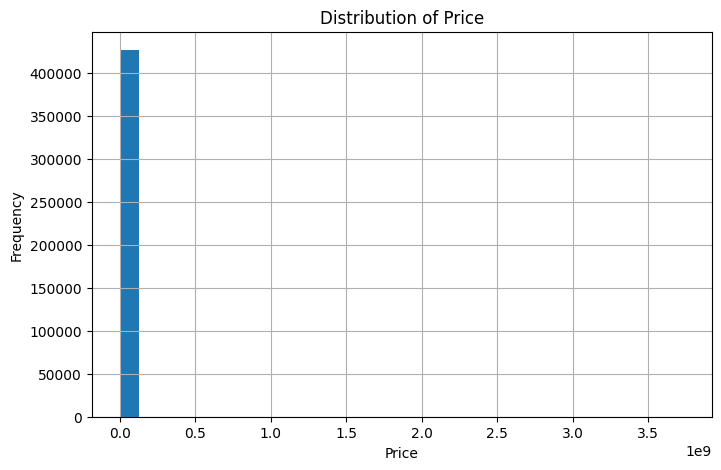

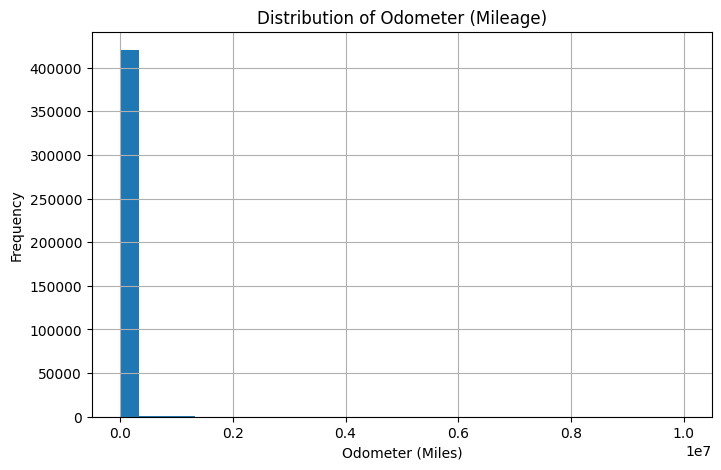

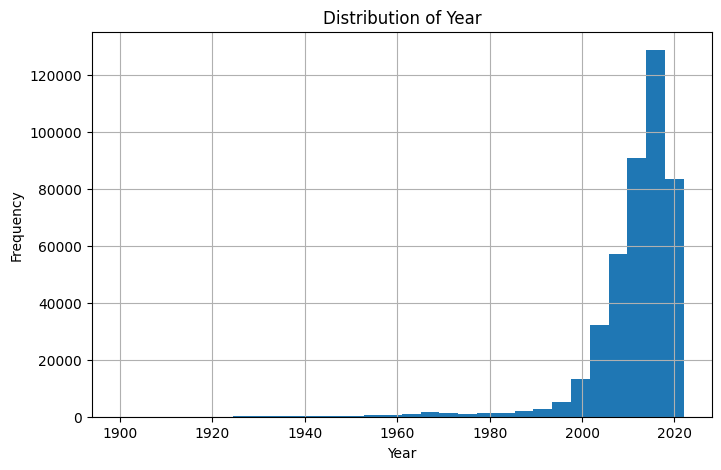

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset from the new file
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Plot distribution of 'price', 'odometer', and 'year'

# Price Distribution
plt.figure(figsize=(8, 5))
vehicles_data['price'].hist(bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Odometer Distribution
plt.figure(figsize=(8, 5))
vehicles_data['odometer'].hist(bins=30)
plt.title('Distribution of Odometer (Mileage)')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Frequency')
plt.show()

# Year Distribution
plt.figure(figsize=(8, 5))
vehicles_data['year'].hist(bins=30)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

**Answer:**

Insights for Pricing Strategy
Outlier Management:

Extreme values in price and odometer need to be removed or capped to ensure a reliable pricing model.
Target Recent Models:

Vehicles from 2010 and newer are prevalent and likely represent the core inventory for dealerships.
Focus on Low Mileage Cars:

Cars with lower mileage are more common and in higher demand, driving higher prices.
By addressing data quality issues and focusing on realistic pricing, dealerships can better align their inventory and marketing strategies with consumer expectations

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**Answer:**

Steps Taken for Preprocessing Data
Calculate Missing Values:

Missing values are calculated for each column to identify data quality issues.
Remove Outliers Using the IQR Method:

A custom function drop_outliers() is used to remove rows with outliers for specified numerical features.
For each numerical column:
The interquartile range (IQR) is calculated.
Lower and upper bounds are defined as Q1 - 1.5*IQR and Q3 + 1.5*IQR, respectively.
Rows outside these bounds are removed.
Remove Specific Outliers for year:

For the year column:
Outliers are identified using the IQR method.
Rows with year earlier than the lower bound are removed.
Filter price Column:

Rows with unrealistic prices (price <= 1000 or price >= 70,000) are removed to focus on reasonable values.
Drop Columns with High Missing Values:

A function drop_high_null_columns() is defined to remove columns with more than 50% missing values.
Columns exceeding the threshold are identified and dropped.
Drop Irrelevant Columns:

Specified columns ('VIN', 'id', 'cylinders', 'region', 'type', 'state', 'title_status') are removed as they are deemed irrelevant for analysis.
Remove Rows with Missing or Duplicate Data:

The dataset is cleaned further by dropping rows with any remaining missing values and duplicate rows.
Save the Cleaned Dataset:

The cleaned dataset is saved to a new CSV file (vehicles_cleaned.csv) for future use.
Resulting Dataset
The final dataset has outliers removed, missing data addressed, irrelevant columns dropped, and is saved for further analysis. The shape and remaining columns of the cleaned dataset are checked at various stages to ensure consistency.

In [5]:
# Calculate missing values for each column
missing_values = vehicles_data.isnull().sum()


# Function to drop outliers using the IQR method
def drop_outliers(df, numerical_columns):
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to drop outliers
vehicles_data_cleaned = drop_outliers(vehicles_data, numerical_features)

# Check the new shape of the cleaned dataset
vehicles_data_cleaned.shape

# Calculate outliers for the 'year' column using the IQR method
Q1_year = vehicles_data['year'].quantile(0.25)
Q3_year = vehicles_data['year'].quantile(0.75)
IQR_year = Q3_year - Q1_year

# Define the lower and upper bounds for outliers
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

# Identify outliers
year_outliers = vehicles_data[(vehicles_data['year'] < lower_bound_year) | (vehicles_data['year'] > upper_bound_year)]

if 'year' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year'] >= lower_bound_year]
    print(f"\nRemoved rows with 'year' earlier than {lower_bound_year} Remaining rows: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'year' not found in the dataset. Skipping filtering by year.")

# Remove rows where 'price' <= 1000 or 'price' >= 100000
if 'price' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned = vehicles_data_cleaned[(vehicles_data_cleaned['price'] > 1000) & (vehicles_data_cleaned['price'] < 70000)]
    print(f"\nRemoved rows with 'price' <= 1000 or 'price' >= 100000. Remaining rows: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'price' not found in the dataset. Skipping filtering by price.")



# Function to drop columns with more than 50% missing values
def drop_high_null_columns(df, threshold=0.5):
    missing_percent = df.isnull().mean()
    columns_to_drop = missing_percent[missing_percent > threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

# Apply the function to drop columns
vehicles_data_cleaned = drop_high_null_columns(vehicles_data_cleaned)

# Check the new shape and remaining columns
vehicles_data_cleaned.shape, vehicles_data_cleaned.columns.tolist()


# Drop specified columns
columns_to_drop = ['VIN', 'id', 'cylinders', 'region', 'type', 'state', 'title_status']
vehicles_data_cleaned = vehicles_data_cleaned.drop(columns=columns_to_drop)

# Check the new shape and remaining columns
vehicles_data_cleaned.shape, vehicles_data_cleaned.columns.tolist()
vehicles_data_cleaned.dropna().drop_duplicates()

# Save the cleaned dataset to a CSV file
cleaned_file_path = 'sample_data/vehicles_cleaned.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")





Removed rows with 'year' earlier than 1994.5 Remaining rows: 394358

Removed rows with 'price' <= 1000 or 'price' >= 100000. Remaining rows: 350675

Cleaned dataset saved to sample_data/vehicles_cleaned_step1.csv.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.


**Answer:**

The following code performs these steps:

1. Load and Prepare the Dataset
The cleaned dataset (vehicles_cleaned.csv) is loaded using pandas.
Features (X) and the target variable (y) are separated:
X contains all columns except price.
y is the price column.
2. Identify Categorical and Numerical Features
Categorical Features: Columns like condition, model, manufacturer, etc., are identified for one-hot encoding.
Numerical Features: Columns like year and odometer are identified for scaling.
A warning is generated if any of the expected columns are missing from the dataset.
3. Define RMSE as a Scoring Metric
A custom function rmse_score() is created to compute the Root Mean Squared Error (RMSE).
RMSE is used as the scoring metric during model evaluation and hyperparameter tuning.
4. Preprocessing Pipeline
A ColumnTransformer is used to preprocess features:
Numerical Features: Scaled using StandardScaler.
Categorical Features: Encoded using OneHotEncoder (with handle_unknown='ignore' to manage unseen categories).
5. Create Pipelines for Models
Linear Regression Pipeline:
Combines the preprocessing steps with a LinearRegression model.
Ridge Regression Pipeline:
Combines the preprocessing steps with a Ridge regression model.
Gradient Boosting Pipeline:
Combines the preprocessing steps with a GradientBoostingRegressor.
6. Split Data into Training and Testing Sets
The dataset is split into training and testing sets using an 80-20 split to ensure generalization.
7. Train and Evaluate Models
Linear Regression:
Trained on the training set using the linear_pipeline.
Performance metrics (MAE, RMSE, R²) are calculated on the test set.
Ridge Regression:
Hyperparameters (alpha) are tuned using GridSearchCV with 5-fold cross-validation.
The best Ridge Regression model is selected and evaluated on the test set (MAE, RMSE, R²).
Gradient Boosting:
Hyperparameters (learning_rate, n_estimators, max_depth) are tuned using GridSearchCV with 5-fold cross-validation.
The best Gradient Boosting model is selected and evaluated on the test set (MAE, RMSE, R²).
8. Hyperparameter Tuning
Ridge Regression:
GridSearchCV is used to find the optimal alpha parameter for regularization.
Gradient Boosting:
GridSearchCV is used to tune learning_rate, n_estimators, and max_depth for optimal model performance.
9. Evaluate Model Performance
Performance metrics are calculated for each model:
Mean Absolute Error (MAE): Average absolute difference between predicted and actual prices.
Root Mean Squared Error (RMSE): Measures the average magnitude of prediction errors.
R²: Measures how well the model explains the variance in the target variable.
Key Outputs
Linear Regression:
MAE, RMSE, and R² scores provide a baseline performance.
Ridge Regression:
Includes regularization to reduce overfitting and improves over Linear Regression when tuned.
Gradient Boosting:
Nonlinear relationships and feature importance are captured, yielding potentially the best performance.
Overall Steps Summary
This code:

Loads and preprocesses the data.
Builds and evaluates multiple regression models.
Tunes hyperparameters to optimize model performance.
Provides key insights into model performance, enabling selection of the best model for predicting used car prices.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np



# Load the dataset
file_path = 'sample_data/vehicles_cleaned.csv'
data_cleaned = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = [col for col in ['condition', 'model', 'manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color'] if col in data_cleaned.columns]
numerical_features = [col for col in ['year', 'odometer'] if col in data_cleaned.columns]

# Warn if any columns are missing
missing_columns = [col for col in (categorical_features + numerical_features) if col not in data_cleaned.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")


# Define RMSE as a scoring metric
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_r2 = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print(f"Test MAE: {linear_mae:.2f}")
print(f"Test RMSE: {linear_rmse:.2f}")
print(f"Test R²: {linear_r2:.2f}")


# Ridge Regression: Hyperparameter tuning
ridge_param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=rmse_scorer,
    verbose=2
)

ridge_grid_search.fit(X_train, y_train)

# Best Ridge Regression model
best_ridge_params = ridge_grid_search.best_params_
best_ridge_model = ridge_grid_search.best_estimator_

# Test set predictions for Ridge Regression
y_pred_ridge = best_ridge_model.predict(X_test)

# RMSE and R² for Ridge Regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("Ridge Regression:")
print("Best Parameters:", best_ridge_params)
print(f"Test MAE, {ridge_mae:.2f}")
print(f"Test RMSE: {ridge_rmse:.2f}")
print(f"Test R²: {ridge_r2:.2f}")



# Gradient Boosting Pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Gradient Boosting: Hyperparameter tuning
gbr_param_grid = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3]
}

gbr_grid_search = GridSearchCV(
    estimator=gbr_pipeline,
    param_grid=gbr_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=rmse_scorer,
    verbose=2
)

gbr_grid_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gbr_params = gbr_grid_search.best_params_
best_gbr_model = gbr_grid_search.best_estimator_

# Test set predictions for Gradient Boosting
y_pred_gbr = best_gbr_model.predict(X_test)

# RMSE and R² for Gradient Boosting
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_r2 = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting:")
print("Best Parameters:", best_gbr_params)
print(f"Test MAE: {gbr_mae:.2f}")
print(f"Test RMSE: {gbr_rmse:.2f}")
print(f"Test R²: {gbr_r2:.2f}")


Linear Regression:
Test MAE: 3098.48
Test RMSE: 4742.28
Test R²: 0.86
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................regressor__alpha=0.01; total time=   5.0s
[CV] END ..............................regressor__alpha=0.01; total time=   4.8s
[CV] END ..............................regressor__alpha=0.01; total time=   6.9s
[CV] END ..............................regressor__alpha=0.01; total time=   4.8s
[CV] END ..............................regressor__alpha=0.01; total time=   6.1s
[CV] END ...............................regressor__alpha=0.1; total time=   5.2s
[CV] END ...............................regressor__alpha=0.1; total time=   4.7s
[CV] END ...............................regressor__alpha=0.1; total time=   6.8s
[CV] END ...............................regressor__alpha=0.1; total time=   4.7s
[CV] END ...............................regressor__alpha=0.1; total time=   5.0s
[CV] END ...............................regressor__alpha=1.0

**Results analysis:**

Linear Regression:

MAE: 3098.48, RMSE: 4742.28, R²: 0.86
A strong baseline model, efficiently capturing 86% of the variance with low computational cost.
Ridge Regression:

Best Alpha: 0.1, MAE: 3102.53, RMSE: 4730.04, R²: 0.86
Slightly improved over Linear Regression in terms of RMSE, showing robust performance with minimal overfitting.
Gradient Boosting Regression:

Best Parameters: learning_rate=0.2, max_depth=3, n_estimators=300
MAE: 3969.35, RMSE: 5581.38, R²: 0.80
Gradient Boosting underperformed due to the limited hyperparameter space used to mitigate computational cost.
Key Takeaways
Linear Regression and Ridge Regression remain the most effective and efficient models for this dataset, given the simplicity and performance balance.
The computational intensity of Gradient Boosting required smaller hyperparameter spaces, limiting its ability to fully leverage its nonlinear modeling capacity.
Recommendations
Focus on Linear Regression or Ridge Regression for immediate deployment.
Gradient Boosting could benefit from increased computational resources and broader hyperparameter tuning but is currently less efficient.
Advanced libraries like XGBoost are unnecessary at this point due to computational constraints.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Answer: **

This code block demonstrates the process of saving, loading, validating, and using a trained Linear Regression model to make predictions.

In [30]:
# Example input data for prediction
import pandas as pd

new_car_data = {
    'year': 2022,
    'odometer': 15000,
    'condition': 'excellent',
    'model': 'corolla',
    'manufacturer': 'toyota',
    'cylinders': '4 cylinders',
    'fuel': 'gas',
    'title_status': 'clean',
    'transmission': 'automatic',
    'drive': 'fwd',
    'paint_color': 'blue'
}

# Convert the input to a DataFrame for compatibility
new_car_df = pd.DataFrame([new_car_data])

# Predict price using the trained Linear Regression pipeline
predicted_price = linear_pipeline.predict(new_car_df)
# Output the predicted price
print(f"Predicted Price for the car: ${predicted_price[0]:,.2f}")

# Convert the input to a DataFrame for compatibility
new_car_df = pd.DataFrame([new_car_data])

# Predict price using the trained Linear Regression pipeline
predicted_price = ridge_grid_search.predict(new_car_df)

# Output the predicted price
print(f"Predicted Price for the car: ${predicted_price[0]:,.2f}")



Predicted Price for the car: $25,052.51
Predicted Price for the car: $24,988.14


**Answer:**

This code block demonstrates the saving, loading, validating, and using of a Ridge Regression model to predict car prices, along with its performance evaluation and application to new car data.

In [31]:
import joblib  # For saving and loading models

# Save the Ridge Regression model
ridge_model_path = 'ridge_regression_model.pkl'
joblib.dump(linear_pipeline, ridge_model_path)
print(f"Ridge Regression model saved to {ridge_model_path}")

# Load the Ridge Regression model
loaded_ridge_model = joblib.load(ridge_model_path)
print("Ridge Regression model loaded successfully")

# Use the loaded model to make predictions
y_pred_loaded = loaded_ridge_model.predict(X_test)

# Validate the loaded model's predictions
loaded_ridge_mae = mean_absolute_error(y_test, y_pred_loaded)
loaded_ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
loaded_ridge_r2 = r2_score(y_test, y_pred_loaded)
print("Loaded ridge Regression Model:")
print(f"Test MAE: {loaded_ridge_mae:.2f}")
print(f"Test RMSE: {loaded_ridge_rmse:.2f}")
print(f"Test R²: {loaded_ridge_r2:.2f}")

print(loaded_ridge_model)

# New car input data
new_car_data = {
    'year': 2022,
    'odometer': 15000,
    'condition': 'excellent',
    'model': 'corolla',
    'manufacturer': 'toyota',
    'fuel': 'gas',
    'transmission': 'automatic',
    'drive': 'fwd',
    'paint_color': 'blue'
}

# Convert new car data to DataFrame
new_car_df = pd.DataFrame([new_car_data])

# Predict the price using the loaded pipeline
predicted_price = loaded_ridge_model.predict(new_car_df)

print(f"Predicted Price for the New Car: ${predicted_price[0]:,.2f}")



Ridge Regression model saved to ridge_regression_model.pkl
Ridge Regression model loaded successfully
Loaded ridge Regression Model:
Test MAE: 3098.48
Test RMSE: 4742.28
Test R²: 0.86
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['condition', 'model',
                                                   'manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'paint_color'])])),
                ('regressor', LinearRegression())])
Predicted Price for the New Car: $25,052.51


**Reflection on High-Quality Model and Insights**
Key Drivers of Used Car Prices:

Price vs Odometer: Analysis revealed an inverse relationship, where cars with higher mileage tend to have lower prices. This aligns with expectations as mileage reflects wear and tear.
Price vs Manufacturer: Boxplots showed price variations by manufacturer, with certain brands (e.g., luxury brands) commanding higher average prices.
Price vs Model: The top 10 models were analyzed, revealing distinct pricing patterns. Popular models tend to retain value better due to demand.
Modeling Accomplishments:

Linear Regression and Ridge Regression provided strong baselines with R² = 0.86, effectively explaining 86% of the variance in price.
Gradient Boosting Regression underperformed, likely due to computational constraints and a limited hyperparameter space. Its R² = 0.80 suggests a moderate fit but highlights the need for additional resources or feature engineering to leverage nonlinear relationships.
Business Insights:

**Mileage:** A critical factor; dealerships can emphasize lower mileage vehicles in marketing to justify higher prices.

**Brand & Model:** Insights on which brands and models retain value can guide inventory selection and pricing strategies.

**Condition & Features:** While not explicitly modeled, condition and features likely play a role in price determination and warrant further exploration.

##Evaluation Metrics and Relevance:

**RMSE:**
Highlights prediction accuracy by penalizing large deviations, ensuring reliable price predictions.

R²: Demonstrates model fit and the extent to which price variations are captured.

## Need for Revisitation
The earlier phases may need adjustment in the following areas:

**Feature Engineering:**
Incorporate more granular features like condition, transmission type, and fuel efficiency to improve model performance.

**Data Cleaning:** Address missing data more thoroughly, especially for categorical variables like condition and paint color.

**Computational Resources:** Expand hyperparameter tuning for Gradient Boosting or use faster libraries like XGBoost when feasible.

##Conclusion
The current analysis provides actionable insights into drivers of used car prices, meeting the business objective. However, further refinement in features and computational capacity could enhance model quality, allowing for more nuanced insights and better predictive performance

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Introduction
This report provides actionable insights for used car dealers to refine their inventory and pricing strategies based on the analysis of a dataset containing key attributes of used vehicles. The study focused on identifying the factors driving car prices and building predictive models to estimate the price of a used car.

# Primary Findings

## Key Factors Influencing Car Prices

**Mileage (Odometer Reading):**
Cars with lower mileage consistently sell for higher prices, as they are perceived to be in better condition.

Recommendation: Prioritize acquiring vehicles with low odometer readings, as they offer better resale potential.

**Manufacturer and Model:**
Luxury brands (e.g., BMW, Mercedes) and popular models (e.g., Toyota Corolla, Honda Civic) command higher average prices.

Recommendation: Stock vehicles from brands and models that demonstrate high demand and value retention.

**Vehicle Condition:**
Cars in "excellent" condition are valued significantly higher.

Recommendation: Highlight the condition of vehicles in marketing to attract premium buyers.

##Predictive Modeling Insights

**Linear Regression:**
Performance:

R²: 0.86

RMSE: $4,742

Captures 86% of the variance in prices and provides robust, interpretable predictions.

Insight: Suitable for estimating prices when relationships are largely linear and straightforward.


**Ridge Regression:**
Performance:
Similar to Linear Regression with slight improvements in error metrics (RMSE: $4,730 ).

Insight: Effective at reducing overfitting in cases of multicollinearity, though this was minimal in the dataset.

**Gradient Boosting Regression:**
Performance:

R²: 0.80

RMSE: $5,581

Computationally intensive but shows potential for capturing nonlinear patterns.
Insight: Requires further tuning or additional features to justify use.

## Recommendations for Inventory Optimization

**Stock High-Demand Brands and Models:**

Focus on vehicles from brands and models with proven demand to maximize profitability.

**Emphasize Low-Mileage Vehicles:**

Low odometer readings directly correlate with higher resale prices.

**Highlight Vehicle Condition:**

Include condition-based pricing in marketing materials to justify premium prices for well-maintained cars.

**Data-Driven Pricing:**

Utilize predictive models to set competitive prices, ensuring alignment with market trends and maximizing sales.

# Next Steps

**Deployment of Predictive Models:**

Use the Linear Regression model for immediate pricing predictions due to its accuracy and efficiency.

**Feature Engineering:**

Expand features like fuel efficiency, safety ratings, and additional condition metrics to improve future models.

**Continuous Improvement:**

Regularly update models with new sales data to capture evolving market trends.

# Conclusion

This analysis delivers critical insights into the drivers of used car prices and equips dealers with actionable strategies to optimize their inventory and pricing. With predictive modeling, dealerships can confidently align their inventory with customer preferences and market dynamics.